In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os


# Path to the ZIP file
zip_path = '/content/drive/MyDrive/CatVsDog/archive (6).zip'

# Extraction path
extract_path = '/content/catvsdog'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['train', 'dogs_vs_cats', 'test']


In [ ]:
import os

# Check the structure of the 'train' folder
train_dir = '/content/catvsdog/train'
print("Train directory contents:", os.listdir(train_dir))

# Check the structure of the 'test' folder
test_dir = '/content/catvsdog/test'
print("Test directory contents:", os.listdir(test_dir))


Train directory contents: ['dogs', 'cats']
Test directory contents: ['dogs', 'cats']


In [ ]:
import os
from PIL import Image

def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify the file integrity
            except (IOError, SyntaxError) as e:
                print(f"Corrupted image found: {file_path}")

# Check both train and test directories
check_images('/content/catvsdog/train')
check_images('/content/catvsdog/test')


In [ ]:
import os

# Paths to train and test directories
train_dir = '/content/catvsdog/train'
test_dir = '/content/catvsdog/test'

def count_images_in_folder(folder_path):
    # Dictionary to store counts for each subfolder
    image_counts = {}
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            # Count all files in the subfolder
            image_counts[subfolder] = len([
                f for f in os.listdir(subfolder_path)
                if os.path.isfile(os.path.join(subfolder_path, f))
            ])
    return image_counts

# Count images in train and test directories
train_image_counts = count_images_in_folder(train_dir)
test_image_counts = count_images_in_folder(test_dir)

print("Train Image Counts:", train_image_counts)
print("Test Image Counts:", test_image_counts)


Train Image Counts: {'dogs': 10000, 'cats': 10000}
Test Image Counts: {'dogs': 2500, 'cats': 2500}


In [ ]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
import numpy as np
import pandas as pd

# Run the test harness for evaluating a model
def run_test_harness():
    model = define_model()
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/content/catvsdog/train/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    test_it = datagen.flow_from_directory(
        '/content/catvsdog/test/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=40,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(40):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 41),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('/content/training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)

# Call the function to run the test harness


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_from_csv(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = {"Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"}
    if not required_columns.issubset(data.columns):
        print(f"CSV file must contain the columns: {required_columns}")
        return

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Train Accuracy'], label='Train Accuracy', marker='o')
    plt.plot(data['Epoch'], data['Val Accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Train Loss'], label='Train Loss', marker='o')
    plt.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

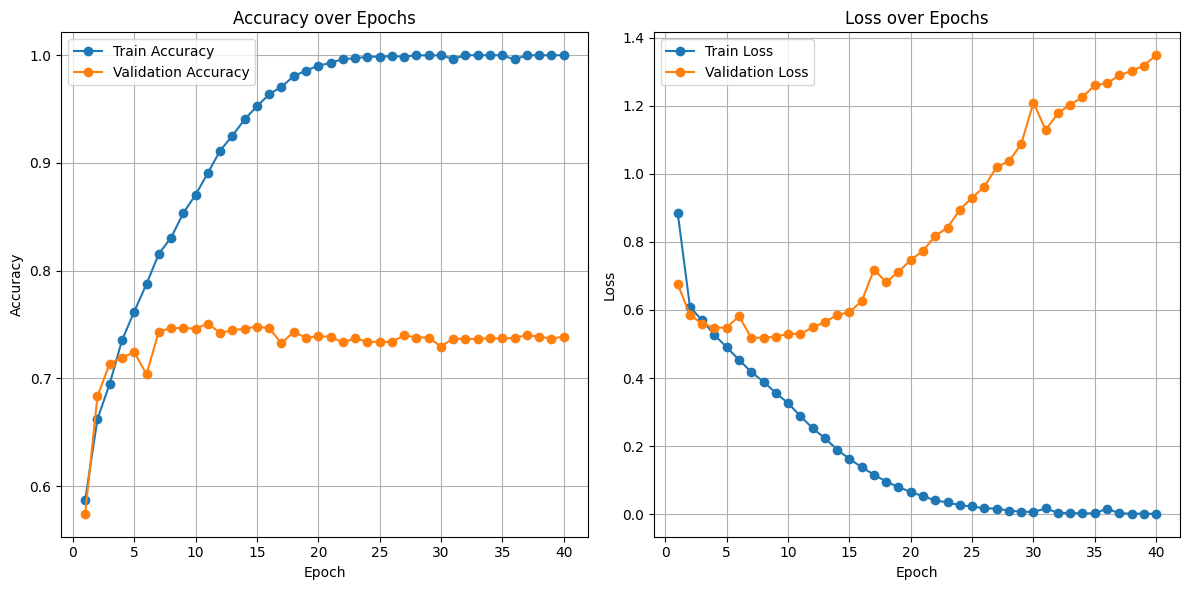

In [ ]:
plot_from_csv('/content/training_history01.csv')

In [ ]:
def define_model():
    # Initialize the model
    model = Sequential()

    # Add layers
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
run_test_harness()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.6057 - loss: 0.8074 - val_accuracy: 0.7370 - val_loss: 0.5326
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.7582 - loss: 0.4995 - val_accuracy: 0.7778 - val_loss: 0.4824
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8009 - loss: 0.4334 - val_accuracy: 0.7756 - val_loss: 0.4728
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.8410 - loss: 0.3719 - val_accuracy: 0.7416 - val_loss: 0.5328
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.8661 - loss: 0.3246 - val_accuracy: 0.7844 - val_loss: 0.4669
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.8908 - loss: 0.2740 - val_accuracy: 0.7942 - val_loss: 0.4673
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.9220 - loss: 0.2223 - val_accuracy: 0.7954 - val_loss: 0.4845
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9422 - loss: 0.1787 - val_accurac

NameError: name 'val_steps' is not defined

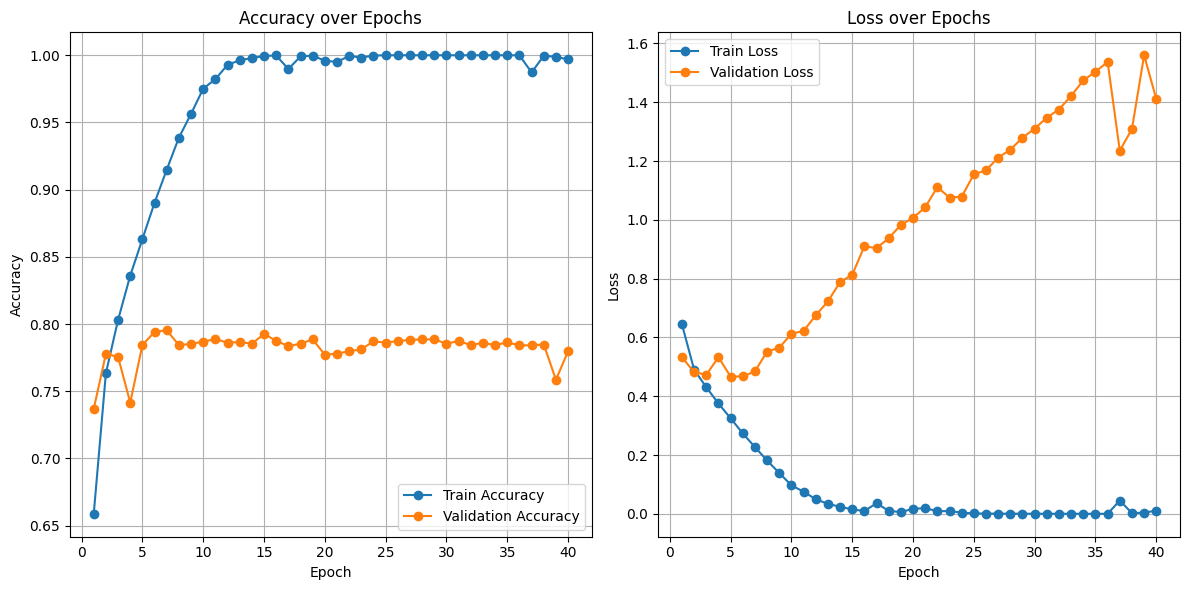

In [ ]:
plot_from_csv('/content/training_history02.csv')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
run_test_harness()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 84ms/step - accuracy: 0.6185 - loss: 0.7747 - val_accuracy: 0.7570 - val_loss: 0.5025
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7785 - loss: 0.4689 - val_accuracy: 0.7886 - val_loss: 0.4623
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8265 - loss: 0.3941 - val_accuracy: 0.8068 - val_loss: 0.4312
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8603 - loss: 0.3266 - val_accuracy: 0.8164 - val_loss: 0.4187
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8958 - loss: 0.2607 - val_accuracy: 0.8170 - val_loss: 0.4219
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9167 - loss: 0.2166 - val_accuracy: 0.8156 - val_loss: 0.4343
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.9404 - loss: 0.1638 - val_accuracy: 0.8202 - val_loss: 0.4424
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9584 - loss: 0.1235 - val_accurac

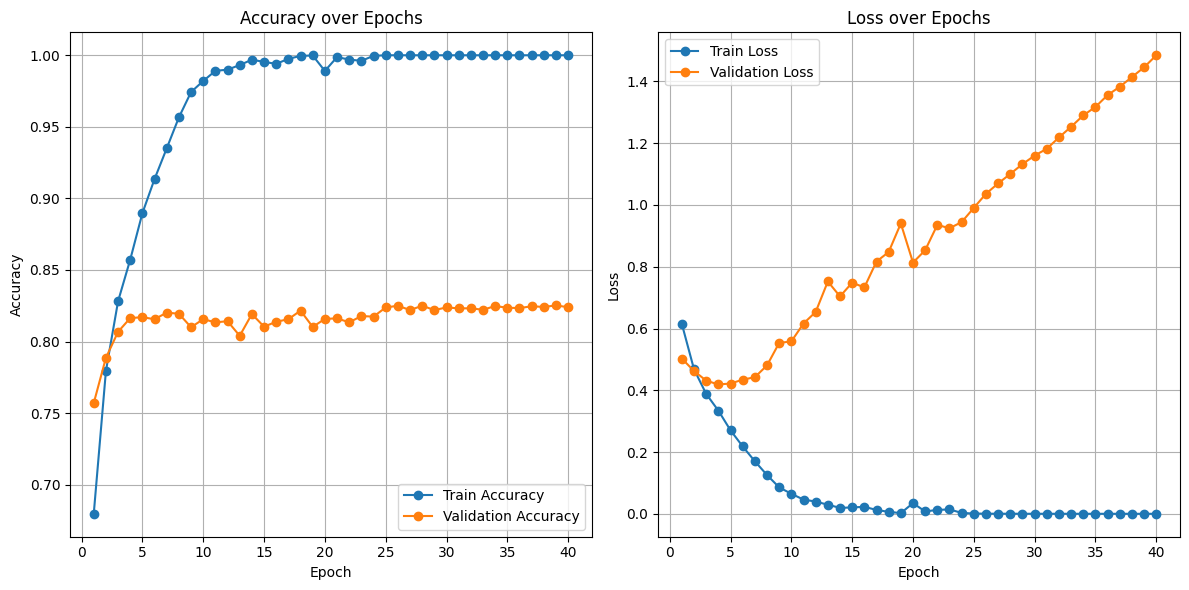

In [ ]:
plot_from_csv('/content/training_history03.csv')

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
run_test_harness()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5015 - loss: 0.8647 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.5018 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.5037 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.4937 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.4934 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.5013 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.4980 - loss: 0.6931 - val_accurac

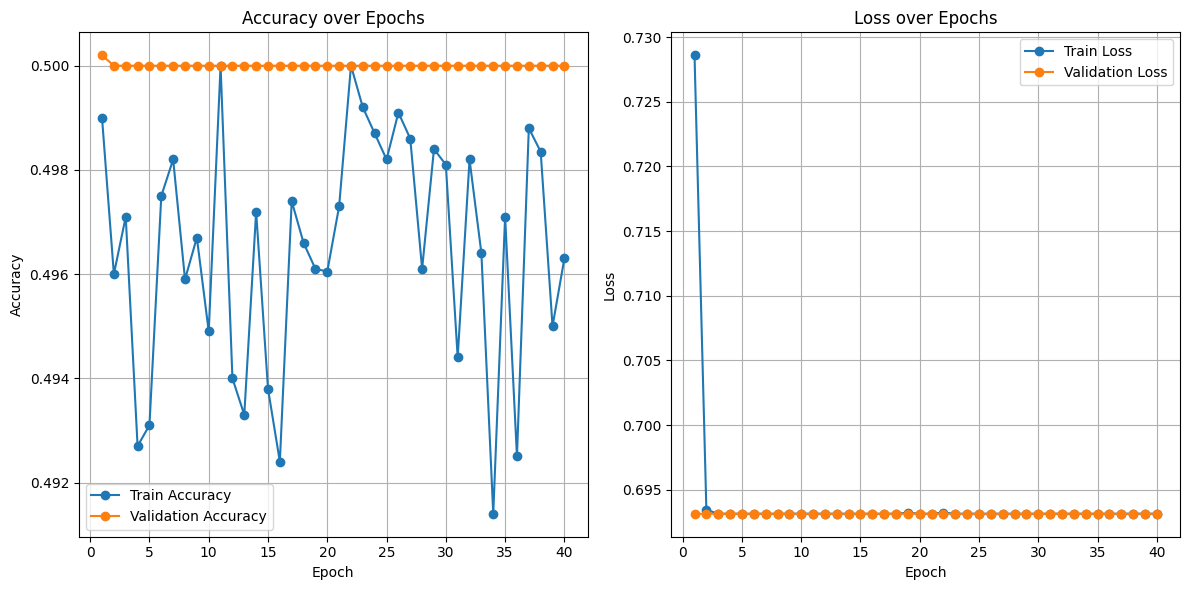

In [ ]:
plot_from_csv('/content/training_history04.csv')